In [ ]:
import brickschema
from brickschema.namespaces import BRICK, RDFS, OWL, TAG, RDF, SH
from rdflib import URIRef
import networkx

from utils import *
from rules.relationship_relaxation import *
from rules.type_relaxation import *
from relaxation_graphs.full_relaxation_graph import *
from evaluation.metrics import *

# Not ideal visual just validation
import matplotlib.pyplot as plt
import networkx as nx
import datetime

brick_graph = brickschema.Graph(load_brick=True)

In [2]:
# #TODO:
# generate metrics and add to the doc
# - 1 building and 2 queries

# write a function to create a graph using the new methods


In [3]:
file = "Data - Brick models/artx.ttl"

q1 = """SELECT ?damper ?vav WHERE {
    ?damper   rdf:type   brick:Damper . 
    ?vav    rdf:type   brick:VAV . 
    ?damper   brick:isPartOf  ?vav   
}"""

q2 = """SELECT ?damper ?vav WHERE {
    ?damper   rdf:type   brick:Damper .
    ?vav      rdf:type   brick:VAV .
    ?damper   brick:isPartOf  ?vav  
}"""

In [11]:
q1_res = get_evaluation_metrics(file="Data - Brick models/artx.ttl", query=q1)
q1_res

{'number_relaxed_queries': 120,
 'number_queries_with_data': 88,
 'max_leve': 9,
 'relaxation_time': 0.034842,
 'querying_time': 16.627731,
 'total_time': 16.662573000000002,
 'minimum_edits_for_result': 1,
 'graph': <networkx.classes.graph.Graph at 0x7fb8219afca0>}

In [12]:
q2_res = get_evaluation_metrics(file="Data - Brick models/artx.ttl", query=q2)
q2_res

{'number_relaxed_queries': 120,
 'number_queries_with_data': 88,
 'max_leve': 9,
 'relaxation_time': 0.029302,
 'querying_time': 16.009878,
 'total_time': 16.03918,
 'minimum_edits_for_result': 1,
 'graph': <networkx.classes.graph.Graph at 0x7fb82168bca0>}

In [13]:
# \1 Metrics - For each Brick model:
#     \2 Number of relaxed queries
#     \2 Percentage of relaxed queries that return answers
#     \2 Number of Levels or Maximum edit cost
#     \2 Execution time (ms/s)
#     \2 Min cost of edits for query to return answer
#     \2 Sum of answers of all queries
#     \2 Percentage of redundant answers

In [14]:
G = q1_res['graph']

In [15]:
max_level = 0
for level_data in G.edges().data('level'):
    if level_data[2] > max_level:
        max_level = level_data[2]
print("max_level: {}".format(max_level))

max_level: 9


In [18]:
# min_level_with_data = -1
# min_nodes_with_data = []
# for edge in G.edges().data():
#     if edge[1] in nodes_with_data:
#         if min_level_with_data == -1:
#             min_level_with_data = edge[2]['level']
#             min_nodes_with_data = [edge[1]]
#         elif min_level_with_data > edge[2]['level']:
#             min_level_with_data = edge[2]['level']
#             min_nodes_with_data = [edge[1]]
#         elif min_level_with_data == edge[2]['level']:
#             min_nodes_with_data.append(edge[1])
# print("Minimum number of edits to get results: {}".format(min_level_with_data))

In [20]:
# min_nodes_with_data

In [22]:
# for node in min_nodes_with_data:
#     print(G.nodes()[node])

In [24]:
for n, node in G.nodes().data():
    print(node['query'])

[['?damper', 'brick:isPartOf', '?vav'], ['?damper', 'rdf:type', 'brick:Damper'], ['?vav', 'rdf:type', 'brick:VAV']]
[['?damper', 'brick:isPartOf', '?vav'], ['?damper', 'rdf:type', 'brick:HVAC_Equipment'], ['?vav', 'rdf:type', 'brick:VAV']]
[['?damper', 'brick:isPartOf', '?vav'], ['?damper', 'rdf:type', 'brick:Damper'], ['?vav', 'rdf:type', 'brick:Terminal_Unit']]
[['?damper', 'brick:hasPart', '?vav'], ['?damper', 'rdf:type', 'brick:Damper'], ['?vav', 'rdf:type', 'brick:VAV']]
[['?damper', 'brick:feeds', '?vav'], ['?damper', 'rdf:type', 'brick:Damper'], ['?vav', 'rdf:type', 'brick:VAV']]
[['?damper', 'brick:isPartOf+', '?vav'], ['?damper', 'rdf:type', 'brick:Damper'], ['?vav', 'rdf:type', 'brick:VAV']]
[['?damper', 'brick:isPartOf', '?vav'], ['?damper', 'rdf:type', 'brick:Equipment'], ['?vav', 'rdf:type', 'brick:VAV']]
[['?damper', 'brick:isPartOf', '?vav'], ['?damper', 'rdf:type', 'brick:HVAC_Equipment'], ['?vav', 'rdf:type', 'brick:Terminal_Unit']]
[['?damper', 'brick:hasPart', '?vav'

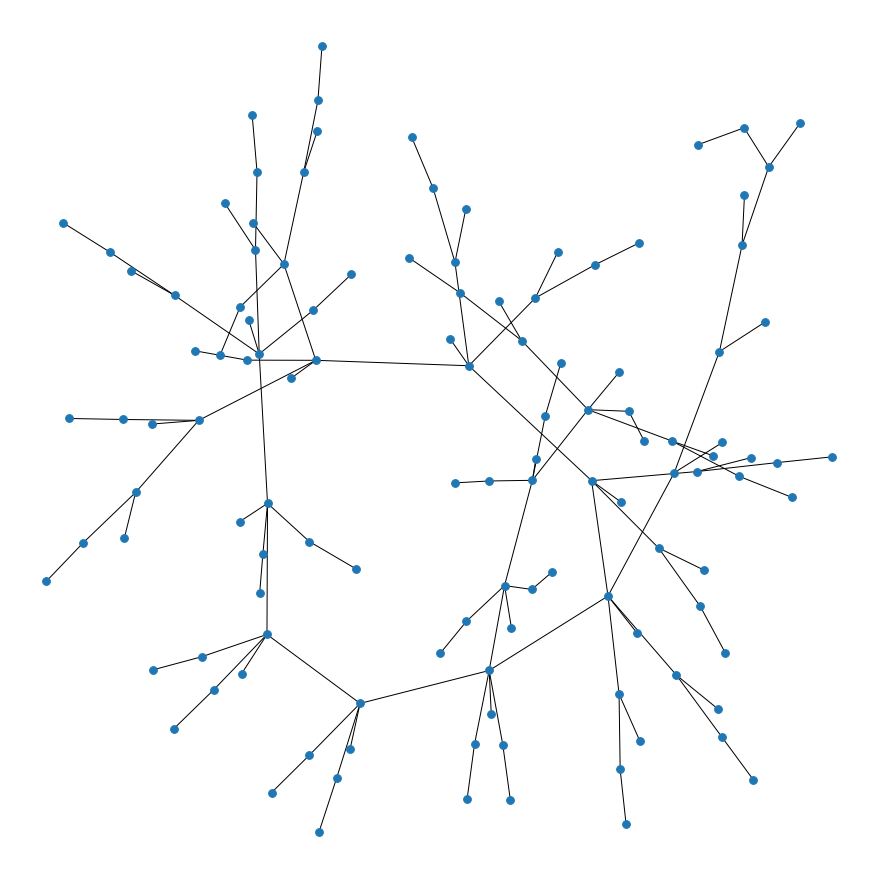

In [25]:
# smaller nodes and fonts
plt.figure(3,figsize=(12,12))
nx.draw(G,node_size=60,font_size=8) 
plt.show()